In [1]:
import math
import numpy
from matplotlib import pyplot
%matplotlib inline

# Exercise 1

In [2]:
# 1.
(2.75 + 3.69j)*(8.55 - 6.13j)

(46.1322+14.692000000000004j)

In [3]:
# 2.
1.4 * numpy.exp (5.32j)

(0.79927078585823497-1.1494199453957457j)

In [4]:
# 3.
(7.51-9.15j)/(4.43+9.64j)

(-0.4880897698448308-1.0033441577191493j)

# Exercise 2

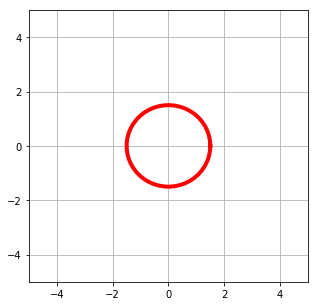

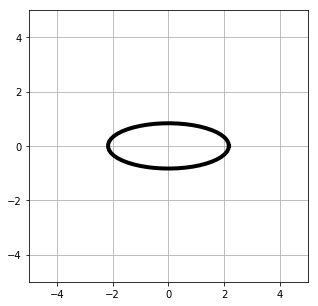

In [5]:
# 1.
r,c,N = 1.5,1.0,50 #defining radius, c and no. of points(N)
theta  = numpy.linspace(0,2*numpy.pi,N)
z_1 = r*numpy.cos(theta) + r*numpy.sin(theta)*1j
e_1 = z_1 + (c**2 / z_1)
size = 5
pyplot.figure(figsize=(size,size))
pyplot.xlim(-5,5)
pyplot.ylim(-5,5)
pyplot.grid(True)
pyplot.plot(z_1.real,z_1.imag, color = 'red',linewidth = 4) # graph for z plane   
size = 5
pyplot.figure(figsize=(size,size))
pyplot.xlim(-5,5)
pyplot.ylim(-5,5)
pyplot.grid(True)
pyplot.plot(e_1.real,e_1.imag,color = 'black',linewidth = 4)# graph for Joukowski plane (e)   

Theta value at trailing edge 0.0


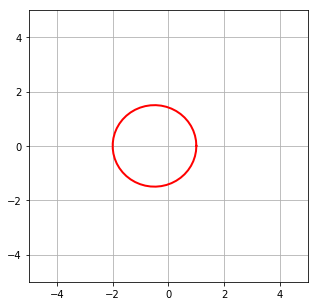

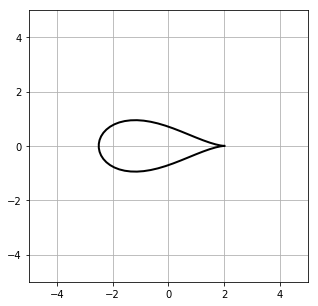

In [6]:
# 2.
r,c,N = 1.5,1.0,50
z_2= (r)*numpy.cos(theta) + (r)*numpy.sin(theta)*1j - 0.5 #Centered at (-0.5,0)
e_2 = z_2 + (c**2 / z_2) 
size = 5
print ("Theta value at trailing edge",theta[0])
pyplot.figure(figsize=(size,size))
pyplot.xlim(-5,5)
pyplot.ylim(-5,5)
pyplot.grid(True)
pyplot.plot(z_2.real,z_2.imag, color = 'red',linewidth = 2) # graph for z plane   
size = 5
pyplot.figure(figsize=(size,size))
pyplot.xlim(-5,5)
pyplot.ylim(-5,5)
 
pyplot.grid(True)
pyplot.plot(e_2.real,e_2.imag,color = 'black',linewidth = 2)# graph for Joukowski plane (e) 

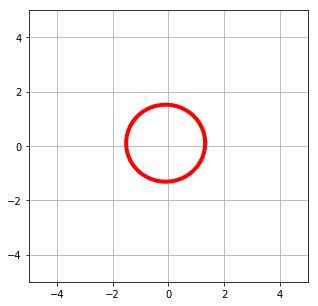

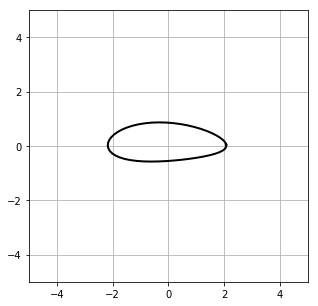

In [7]:
# 3.
r,c,N = 1.4177,1.0,50
delx,dely=0.1,0.1
z_3= (r)*numpy.cos(theta) + (((r)*numpy.sin(theta)+dely)*1j)  - delx # Center at (-0.1,0.1)
e_3 = z_3 + (c**2 / z_3)
size = 5
pyplot.figure(figsize=(size,size))
pyplot.xlim(-5,5)
pyplot.ylim(-5,5)
pyplot.grid(True)
pyplot.plot(z_3.real,z_3.imag, color = 'red',linewidth = 4) # graph for z plane   
size = 5
pyplot.figure(figsize=(size,size))
pyplot.xlim(-5,5)
pyplot.ylim(-5,5)
 
pyplot.grid(True)
pyplot.plot(e_3.real,e_3.imag,color = 'black',linewidth = 2)# graph for Joukowski plane (e) 

# Grid points on the z-plane using polar coordinates

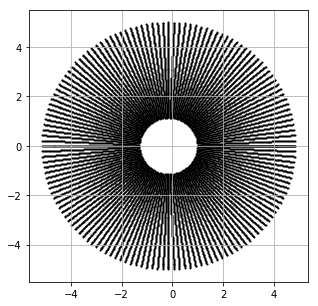

In [8]:
R_begin,R_end = 1.15,5.0;
NR=100
Nthe=145
r=numpy.linspace(R_begin,R_end,NR)
theta1=numpy.linspace(0,numpy.pi*2,Nthe)
r1,THETA=numpy.meshgrid(r,theta1) #creating mesh grid of radius and theta array 
z= (r1)*numpy.cos(THETA) +  (((r1)*numpy.sin(THETA))*1j)-0.15  # Centered at (-0.15,0)
pyplot.figure(figsize = (size,size))
pyplot.grid()
pyplot.scatter(z.real,z.imag, color = 'k', s = 1) #plot for cylinder

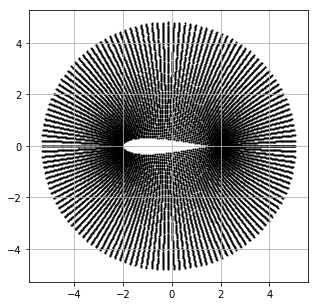

In [9]:
e = z + (c**2 / z)
pyplot.figure(figsize = (size,size))
pyplot.grid()
pyplot.scatter(e.real,e.imag, color = 'k', s = 1); #plot for airfoil


# Flow over a symmetric Joukowski airfoil with zero angle of attack

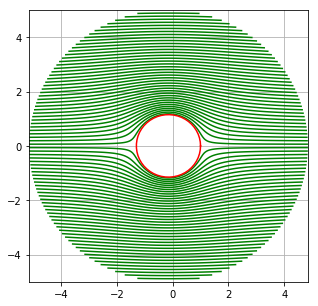

In [10]:
U_inf=1.0  #free stream velocity
psi_free = U_inf*z.imag   #free stream streamfunction
R_new=1.15
x_d=c-R_new
k=2*math.pi*R_new**2*U_inf #kappa (strength of doublet)
u = ( -k / (2 * math.pi) *((z.real-x_d)**2 - (z.imag)**2) /((z.real-x_d)**2 + (z.imag)**2)**2)
v = (- k / (2 * math.pi) * 2 * (z.real-x_d) * (z.imag) / ((z.real-x_d)**2 + (z.imag)**2)**2)
psi = - k / (2 * math.pi) * (z.imag) / ((z.real-x_d)**2 + (z.imag)**2)
U=u+U_inf
PSI=psi+psi_free
z_final = R_new*numpy.cos(theta) + R_new*numpy.sin(theta)*1j-0.15
pyplot.figure(figsize=(size,size)) 
psi_range=numpy.linspace(numpy.min(PSI),numpy.max(PSI),80)
pyplot.contour(z.real,z.imag,PSI,levels = psi_range,colors = 'green',linestyles = 'solid') #plotting cylinder
pyplot.plot(z_final.real,z_final.imag,color = 'red')
pyplot.grid()

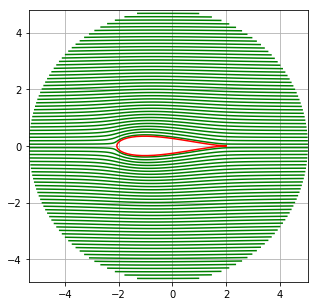

In [11]:
ee = z_final + (c**2 / z_final)
pyplot.figure(figsize=(size,size))
psi_range2=numpy.linspace(numpy.min(PSI),numpy.max(PSI),80)
pyplot.contour(e.real,e.imag,PSI,levels = psi_range2,colors = 'green', linestyles='solid') #plotting airofoil
pyplot.plot(ee.real,ee.imag,color='red')
pyplot.grid()

# Velocity vectors and pressure coefficients

(-2, 2)

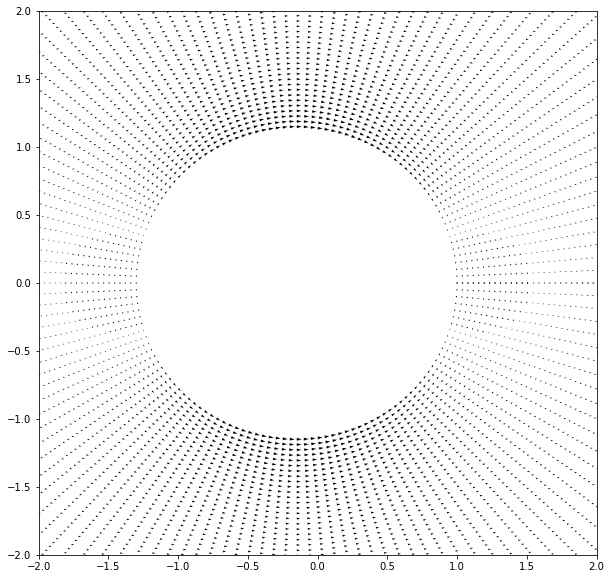

In [12]:
size=10
pyplot.figure(figsize=(size,size))   # plotting velocity vectors for cylinder
pyplot.quiver(z.real,z.imag,U,v)
pyplot.xlim(-2,2)
pyplot.ylim(-2,2)

(-3, 3)

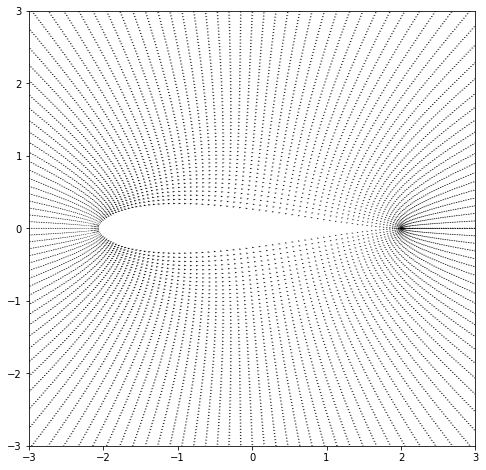

In [13]:
w=(U-v*1j)/(1-((c/z)**2));  #Velocity in e plane (Conformally mapped)
size=8
pyplot.figure(figsize=(size,size)) # plotting velocity vectors for aerofoil
pyplot.quiver(e.real,e.imag,w.real,w.imag)
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)

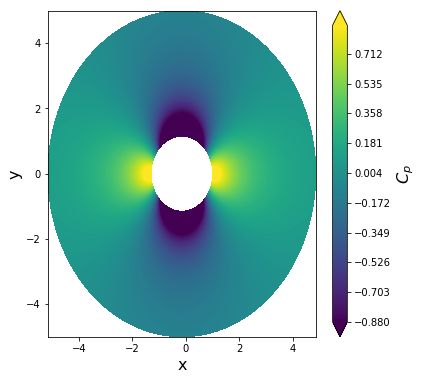

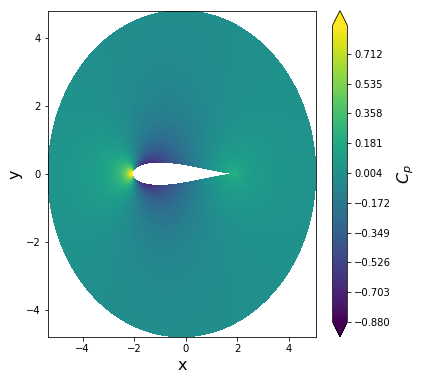

In [14]:
cpz = 1-(U**2+v**2)/U_inf**2 #Cp for cylinder
cpe = 1-((w.real**2+w.imag**2)/U_inf**2) #Cp for Aerofoil
size=6
#plot
pyplot.figure(figsize=(size,size))   #plot for cylinder
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)

contf = pyplot.contourf(z.real, z.imag, cpz, levels=numpy.linspace(-0.88,0.88,200), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)

pyplot.figure(figsize=(size,size))     #plot for airfoil
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)

contf = pyplot.contourf(e.real, e.imag, cpe, levels=numpy.linspace(-0.88,0.88,200), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)

### Strength of the doublet

In [15]:
print ("Strength of doublet",k)

Strength of doublet 8.309512568745001


In [16]:
w[61,0]  # value of velocity at 62nd point       

(1.1063384662852436-0.52363334929849692j)

In [17]:
cpe.min() #minimum value of CP on aerofoil 

-0.68775567409240423

# Flow over a symmetric Joukowski airfoil with non-zero angle of attack, without circulation

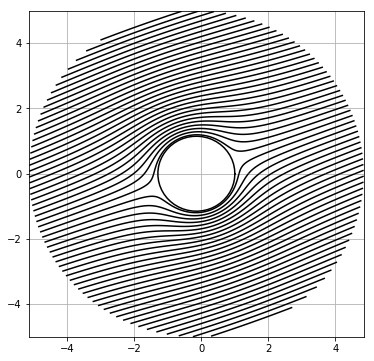

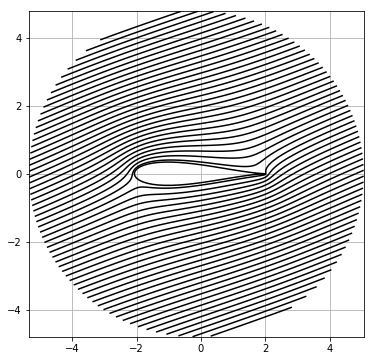

In [18]:
angle = 20*numpy.pi/180
xc=-0.15 #center at (-0.15,0)
xprime = (z.real-xc)*numpy.cos(angle)+(z.imag*numpy.sin(angle))   #Doublet center is at (0,0)
yprime = -(z.real-xc)*numpy.sin(angle)+(z.imag*numpy.cos(angle))
uprime = ( -k / (2 * math.pi) *((xprime)**2 - (yprime)**2) /((xprime)**2 + (yprime)**2)**2)
vprime = (- k / (2 * math.pi) * 2 * (xprime) * (yprime) / ((xprime)**2 + (yprime)**2)**2)
psiprime = - k / (2 * math.pi) * (yprime) / ((xprime)**2 + (yprime)**2)

u_total_prime = uprime + U_inf
psifree_total_prime = U_inf*yprime
psi_total_prime = psiprime + psifree_total_prime

pyplot.figure(figsize=(size,size))
pyplot.contour(z.real,z.imag,psi_total_prime,levels = numpy.linspace(numpy.min(psi_total_prime),numpy.max(psi_total_prime),60),colors = 'k',linestyles = 'solid')
pyplot.plot(z_final.real,z_final.imag,color = 'k')
pyplot.grid()
l=numpy.linspace(numpy.min(psi_total_prime),numpy.max(psi_total_prime),60)
pyplot.figure(figsize=(size,size))
pyplot.contour(e.real,e.imag,psi_total_prime,levels=l,colors = 'k',linestyles='solid')
pyplot.plot(ee.real,ee.imag,color='k')
pyplot.grid()

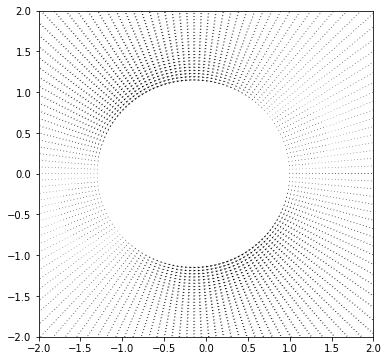

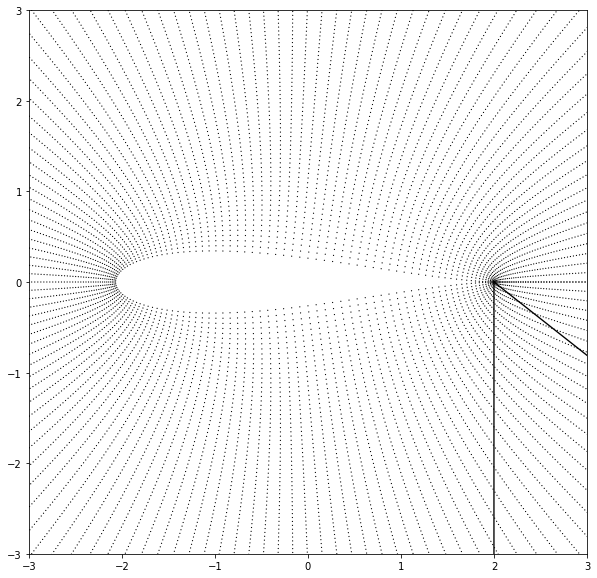

In [19]:
size=6
Vprime = (u_total_prime-vprime*1j)*numpy.exp(-angle*1j)
pyplot.figure(figsize=(size,size))   # plotting velocity vectors for cylinder
pyplot.quiver(z.real,z.imag,Vprime.real,-Vprime.imag)
pyplot.xlim(-2,2);
pyplot.ylim(-2,2);
wprime=Vprime/(1-((c/z)**2));  #Velocity in e plane (Conformally mapped)
size=10
pyplot.figure(figsize=(size,size)) # plotting velocity vectors for aerofoil
pyplot.quiver(e.real,e.imag,wprime.real,-wprime.imag)
pyplot.xlim(-3,3);
pyplot.ylim(-3,3);

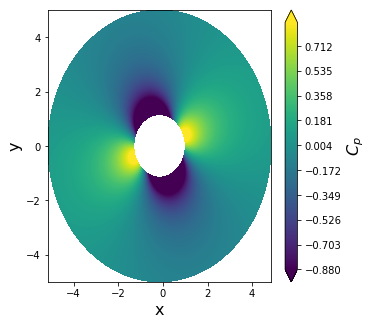

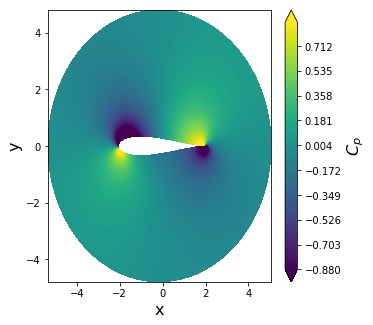

In [20]:
cpz_prime = 1-((Vprime.real**2+Vprime.imag**2)/(U_inf**2)) #Cp for cylinder
cpe_prime = 1-((wprime.real**2+wprime.imag**2)/(U_inf**2)) #Cp for Aerofoil
size=5
#plot
pyplot.figure(figsize=(size,size))   #plot for cylinder
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)

contf = pyplot.contourf(z.real, z.imag, cpz_prime, levels=numpy.linspace(-0.88,0.88,200), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)

pyplot.figure(figsize=(size,size))     #plot for aerofoil
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)

contf = pyplot.contourf(e.real, e.imag, cpe_prime, levels=numpy.linspace(-0.88,0.88,200), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)

### Questions


1. Do you think the flow over the airfoil we obtained here is reasonable? Why or why not?

Ans. It is not reasonable as we assume poteintial flow over the cylinder and aerofoil which ignores the shear stresses within the formation of Boundary layer and the viscous effect within the layer itself

 2.Where are the stagnation points on the airfoil?

Ans. 8,80   and the index is 9,81

In [21]:
a=numpy.where(cpe_prime==1)
print(a)

(array([ 8, 80]), array([0, 0]))


3.How much is the lift?

Ans. No lift generation as in order to generate lift circulation should be provided. 

4.How much is the drag?

Ans. There is no drag force observed or considered due to the assumption by poteintial theory.

5.What is the velocity at the 50th point on the airfoil surface?

In [22]:
wprime[49,0]

(1.4830654150147842-0.092075495007287816j)

6.What is the pressure coefficient at the 75th point on the airfoil surface?

In [23]:
cpe_prime[74,0]

-0.48520991643725964

# Flow over a symmetric Joukowski airfoil with non-zero angle of attack, with circulation

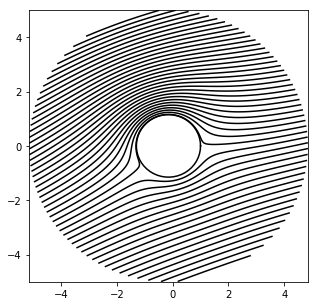

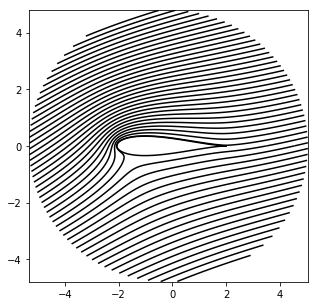

In [24]:
c_v=-k*math.sin(-2*angle)/(R_new*math.cos(-angle)) #calculating strength of vortex
u_vortex = c_v / (2 * math.pi) * (yprime) / ((xprime)**2 + (yprime)**2)
v_vortex = -c_v / (2 * math.pi) * (xprime) / ((xprime)**2 + (yprime)**2)
psi_vortex = c_v / (4 * math.pi) * (numpy.log((xprime)**2 + (yprime)**2))
u_circulation = u_vortex + u_total_prime
v_circulation = v_vortex + vprime
psi_circulation = psi_vortex + psi_total_prime


pyplot.figure(figsize=(size,size))
pyplot.contour(z.real,z.imag,psi_circulation,levels = numpy.linspace(numpy.min(psi_circulation),numpy.max(psi_circulation),51),colors = 'k',linestyles = 'solid')
pyplot.plot(z_final.real,z_final.imag,color = 'k') #plotting cylinder in z plane


pyplot.figure(figsize=(size,size)) #plotting airfoil in e plane 
pyplot.contour(e.real,e.imag,psi_circulation,levels = numpy.linspace(numpy.min(psi_circulation),numpy.max(psi_circulation),51),colors = 'k',linestyles = 'solid')
pyplot.plot(ee.real,ee.imag,color = 'k')

1.0


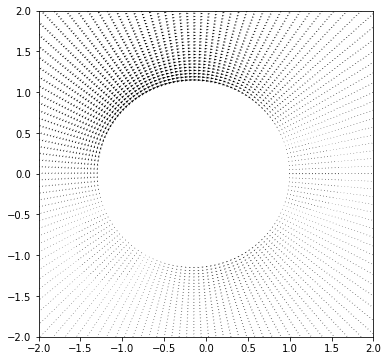

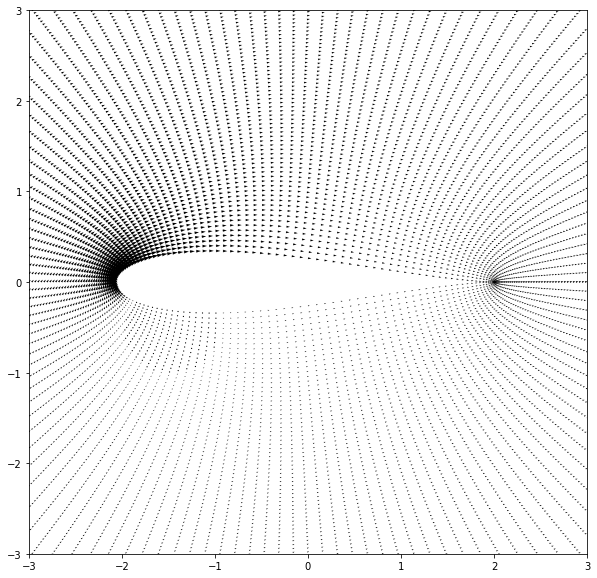

In [25]:
size=6
V_circulation = (u_circulation-v_circulation*1j)*numpy.exp(-angle*1j)
pyplot.figure(figsize = (size,size))   # plotting velocity vectors for cylinder
pyplot.quiver(z.real,z.imag,V_circulation.real,-V_circulation.imag)
pyplot.xlim(-2,2)
pyplot.ylim(-2,2)
w_circulation=(V_circulation)/(1-(c/z)**2)  #Velocity in e plane (Conformally mapped)
size=10
pyplot.figure(figsize=(size,size)) # plotting velocity vectors for aerofoil
pyplot.quiver(e.real,e.imag,w_circulation.real,-w_circulation.imag)
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)
print (c)

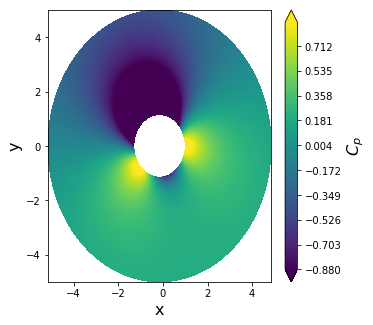

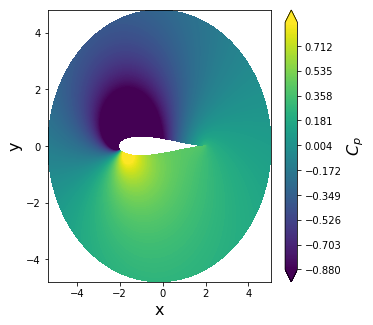

In [26]:
cpz_circulation = 1-((u_circulation**2+v_circulation**2)/(U_inf**2)) #Cp for cylinder
size=5
#plot
pyplot.figure(figsize=(size,size))   #plot for cylinder
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)

contf = pyplot.contourf(z.real, z.imag, cpz_circulation, levels=numpy.linspace(-0.88,0.88,200), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)

cpe_circulation = 1-((w_circulation.real**2+w_circulation.imag**2)/(U_inf**2))  #Cp for Aerofoil


pyplot.figure(figsize=(size,size))     #plot for aerofoil
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)

contf = pyplot.contourf(e.real, e.imag, cpe_circulation, levels=numpy.linspace(-0.88,0.88,200), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)

#### Questions

1.What is the strength of the vortex?

In [27]:
print (c)

1.0


2.How much is the lift and does it agree with the Kutta-Joukowski theorem? The lift, $L=-\oint p \times \sin{\theta} dA$, is perpendicular to the free-stream direction.

Ans. After integrating the above equation based on kutta_joukowski theorem equation for rotating cylinder. Lift=density*U(free stream)*strength of vortex

In [28]:
density=1.0
L = density*U_inf*c
print(L)

1.0


3.How much is the drag? The drag, $D=-\oint p \times \cos{\theta} dA$, is in the direction of the free-stream.

O as poteintial flow assumption is considered

4.What are the index of the stagnation points on the airfoil? (We assume that the trailing edge is the $1^\text{st}$ point and that we index the points counterclockwise.)

In [29]:
b=numpy.where(cpe_circulation==1)
b

(array([88]), array([0]))

5.What is the velocity at the $92^\text{nd}$ point on the airfoil?

In [30]:
w_circulation[91,0]    

(0.20848311620747648+0.031988389195052536j)

6.What is the pressure coefficient at the $111^\text{th}$ point on the airfoil?

In [31]:
cpe_circulation[110,0]

0.49669467238347365

7.Explain what is going on with the pressure coefficient at the trailing edge of the airfoil.

Cp values at edge goes to infinity due to potential flow assumption of considering non viscous flow